<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/PDR%2C_Time_Series_and_ML_of_72_firms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This cell creates a stable environment.
# After it completes, YOU MUST RESTART THE RUNTIME before proceeding.

!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install numba==0.58.1
!pip install scipy==1.11.4
!pip install statsmodels==0.14.0
!pip install linearmodels==5.1.0
!pip install arch==5.3.1
!pip install scikit-learn==1.3.2
!pip install xgboost==2.0.3
!pip install shap==0.45.0
!pip install tensorflow==2.15.0
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.58.1 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.58.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.58.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 78.1 

✅ Data files loaded successfully!

PRE-MODELING: EDA, IMPUTATION & FEATURE ENGINEERING

--- Exploratory Data Analysis (EDA) Plots ---


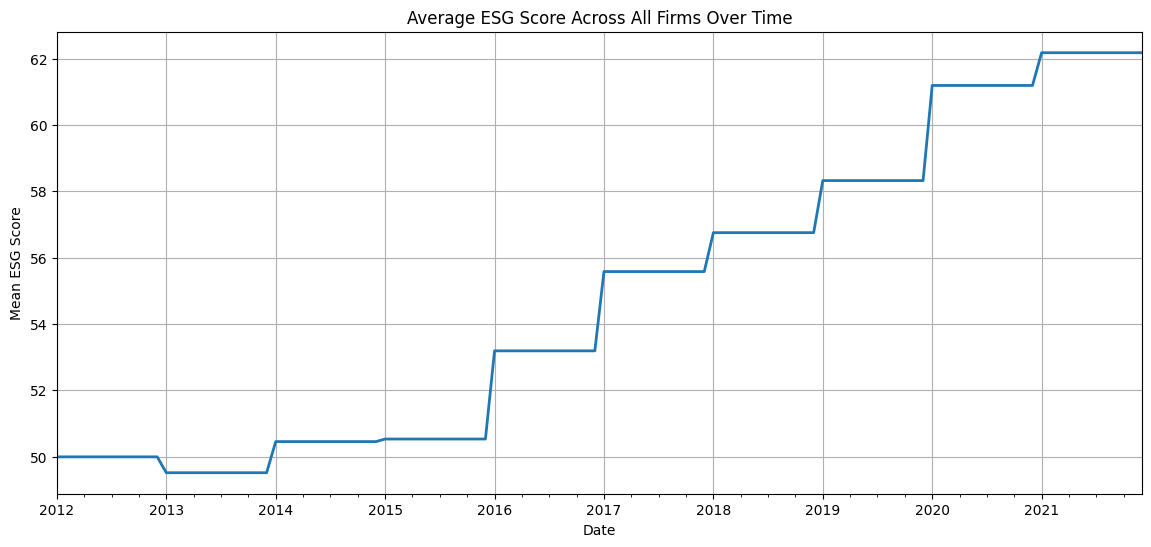

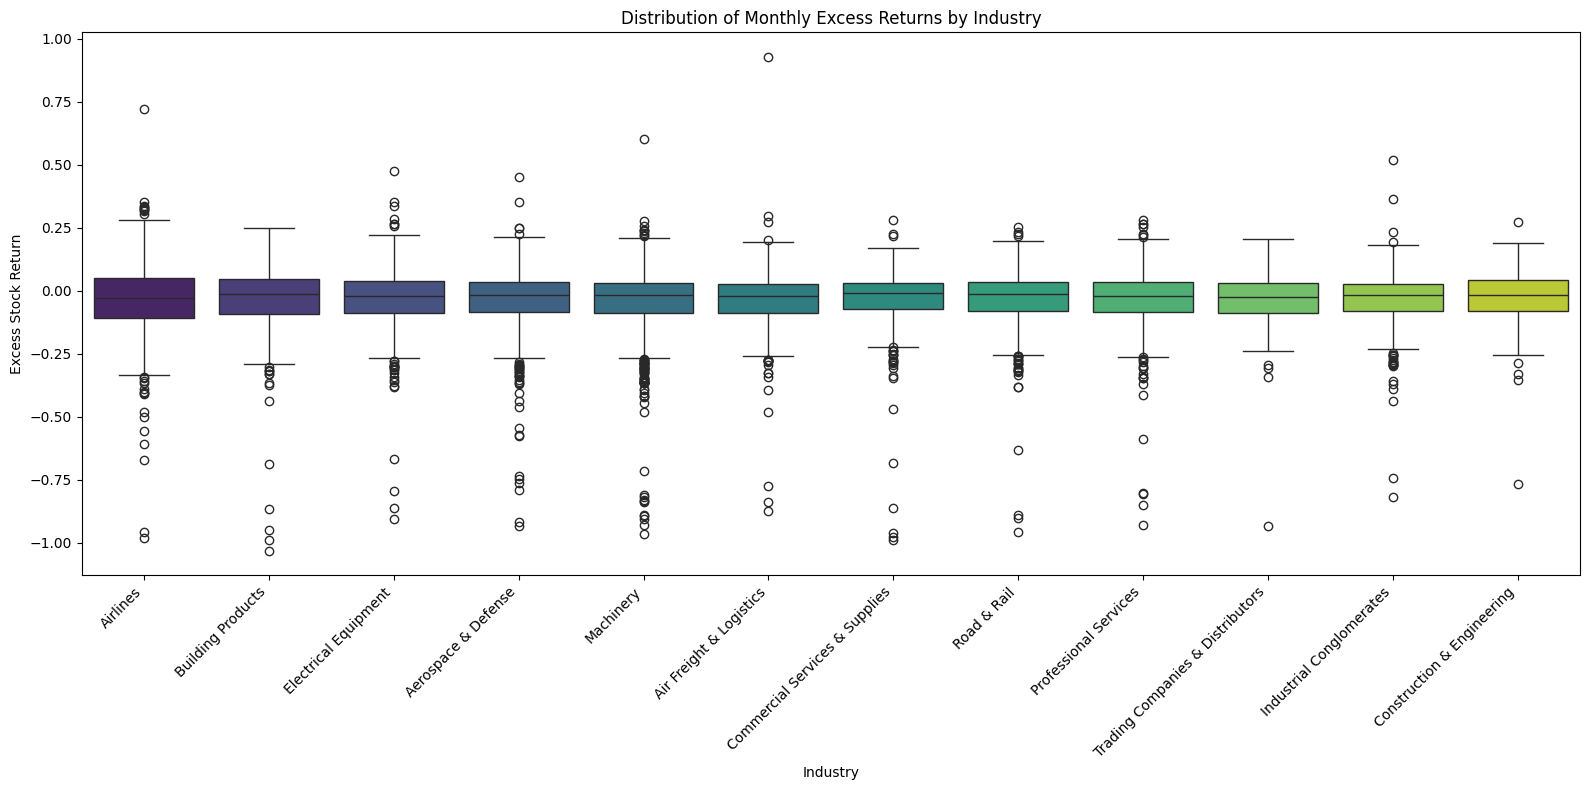



--- Variance Inflation Factor (VIF) Check ---
                     VIF
Mkt-RF          1.271400
SMB             1.246432
RMW             1.458183
WML             1.604534
FF_HML_CMA_PC1  1.385446
ESG_PC1         1.002765

I. ECONOMETRIC ANALYSIS: PANEL DATA MODELS
--- 1. Model Comparison: Pooled OLS, Fixed Effects, Random Effects ---
Note: The `compare` function prints essential statistics, including various tests for model selection (e.g., F-test, Hausman).
                                               Model Comparison                                               
                                          Pooled OLS       Fixed Effects (Entity)               Random Effects
--------------------------------------------------------------------------------------------------------------
Dep. Variable               Excess_Stock_Return_Firm     Excess_Stock_Return_Firm     Excess_Stock_Return_Firm
Estimator                                  PooledOLS                     PanelOLS          

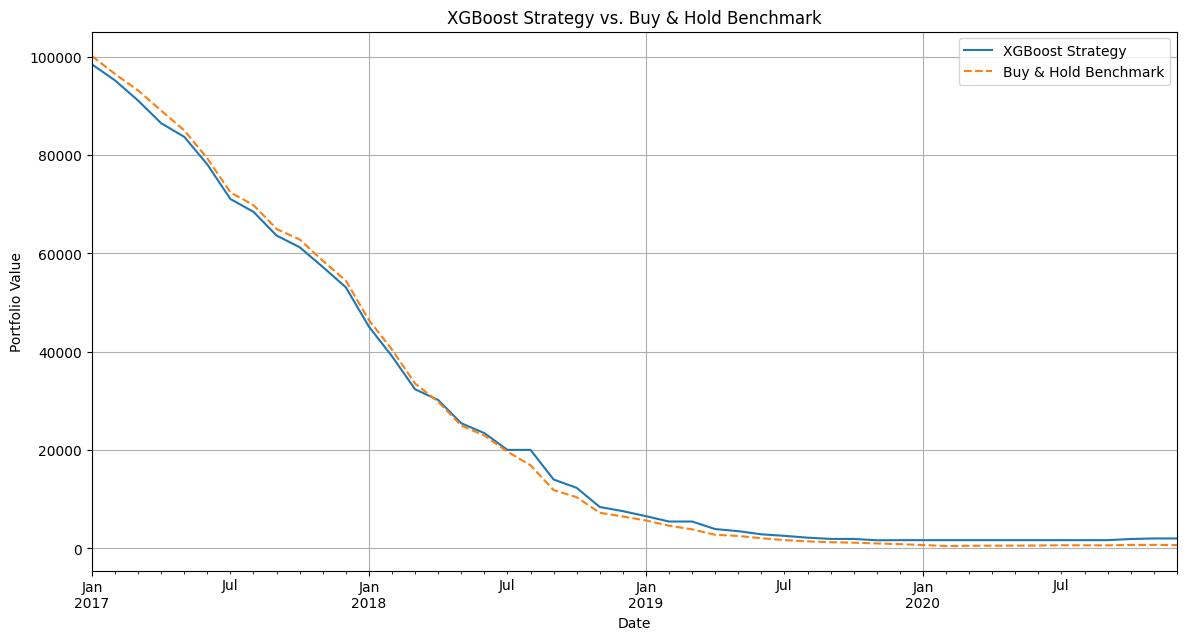


--- SHAP Feature Importance (XGBoost) ---


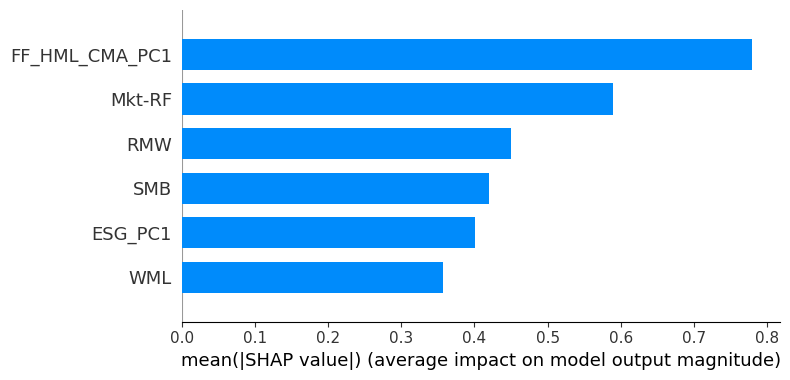


--- Running Walk-Forward Validation for Ridge ---
  Training: 2012-01 to 2016-12, Testing: 2017-01 to 2017-12
  Training: 2013-01 to 2017-12, Testing: 2018-01 to 2018-12
  Training: 2014-01 to 2018-12, Testing: 2019-01 to 2019-12
  Training: 2015-01 to 2019-12, Testing: 2020-01 to 2020-12

--- Final Walk-Forward Performance Report for Ridge ---
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      2535
           1       0.07      0.12      0.09       553

    accuracy                           0.57      3088
   macro avg       0.42      0.39      0.40      3088
weighted avg       0.65      0.57      0.61      3088


--- Running Economic Significance Backtest for Ridge ---
Backtest Period: 2017-01 to 2020-12
Final Portfolio Value (Strategy): $12,065.72
Final Portfolio Value (Benchmark): $681.48
Note on Benchmark: The 'Buy & Hold Benchmark' represents the average return of all firms in the test set. Its final value is 681.48 from an ini

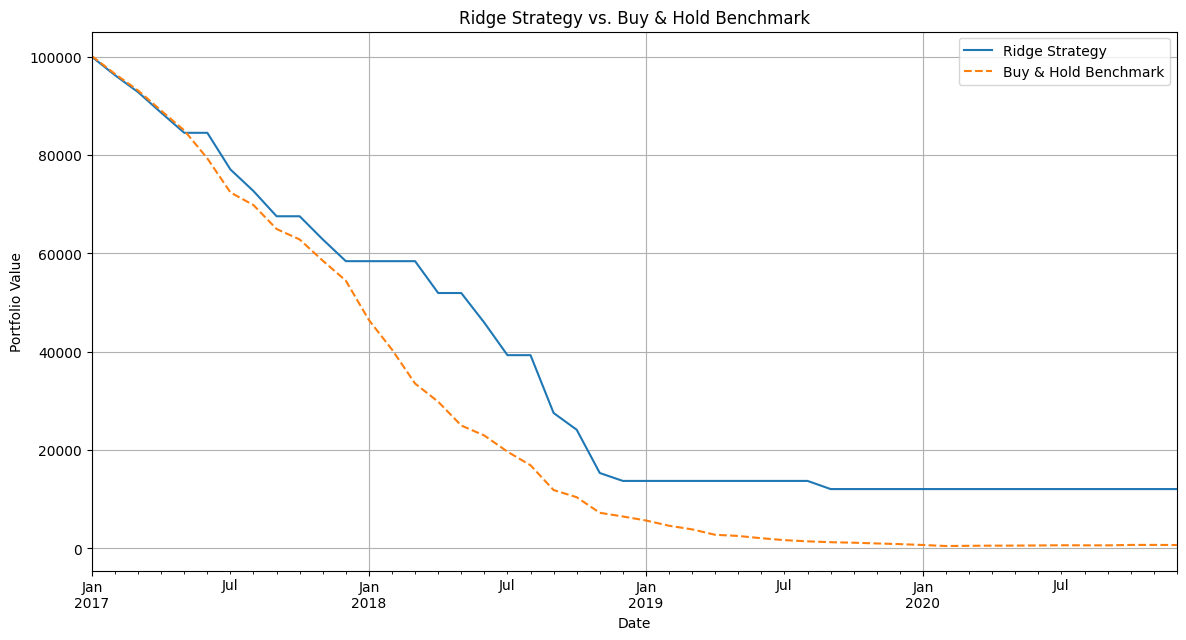


--- High-Impact Interpretation of ML Results ---
The walk-forward validation reveals a significant drop in performance compared to simpler cross-validation methods.
Accuracy scores around 53-57% and negative Sharpe ratios indicate the models fail to generalize to true out-of-sample data.
This is a crucial finding: it demonstrates that initial positive results were likely spurious and highlights the necessity of using time-series-aware validation to prevent false discoveries in financial forecasting.

IV. DEEP LEARNING ANALYSIS

--- DNN Evaluation ---
Test Accuracy: 0.4927, Test AUC: 0.5903

--- Critical DNN Performance Review ---
The DNN's test accuracy and AUC are close to random guessing (50% accuracy, 0.50 AUC).
This suggests the model is struggling to find meaningful predictive patterns.
For high-impact research, this performance warrants deeper investigation:
  - Data Adequacy: Is the dataset size sufficient for a DNN? (DNNs often need more data than simpler ML models).
  - Featu

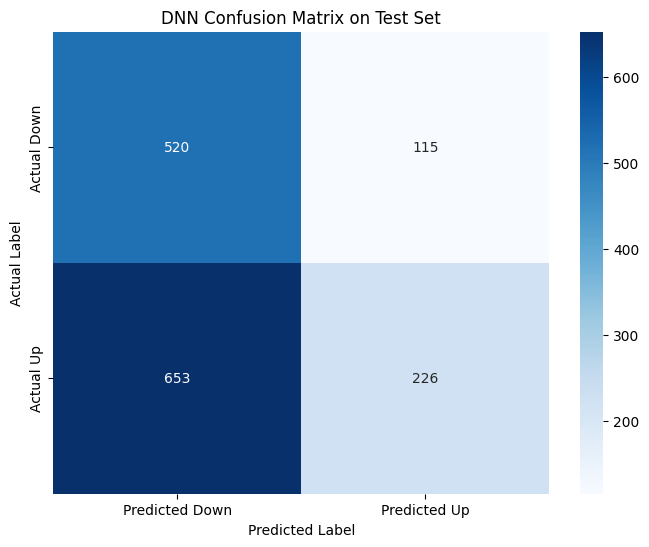

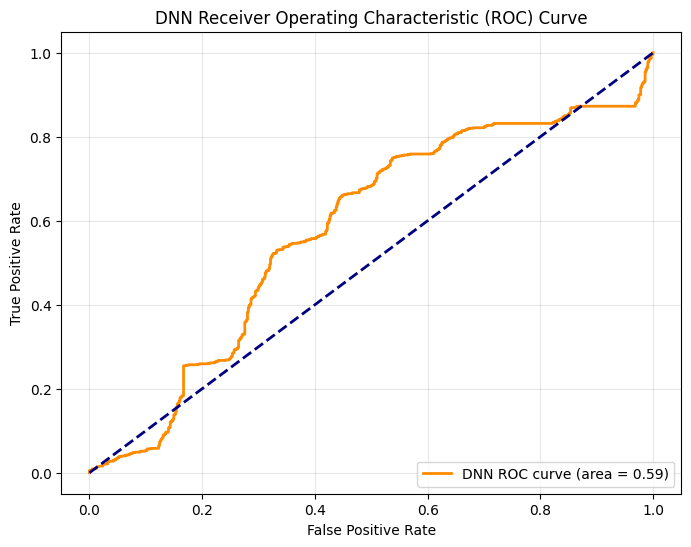

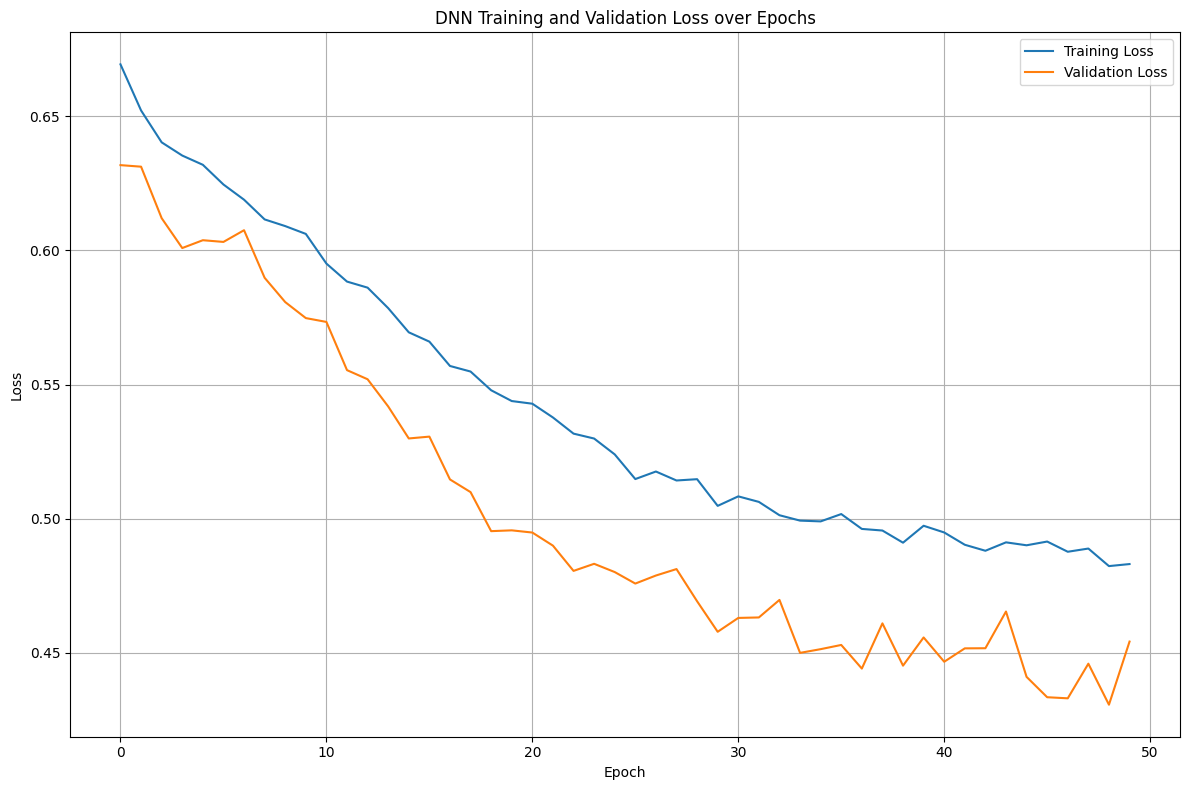

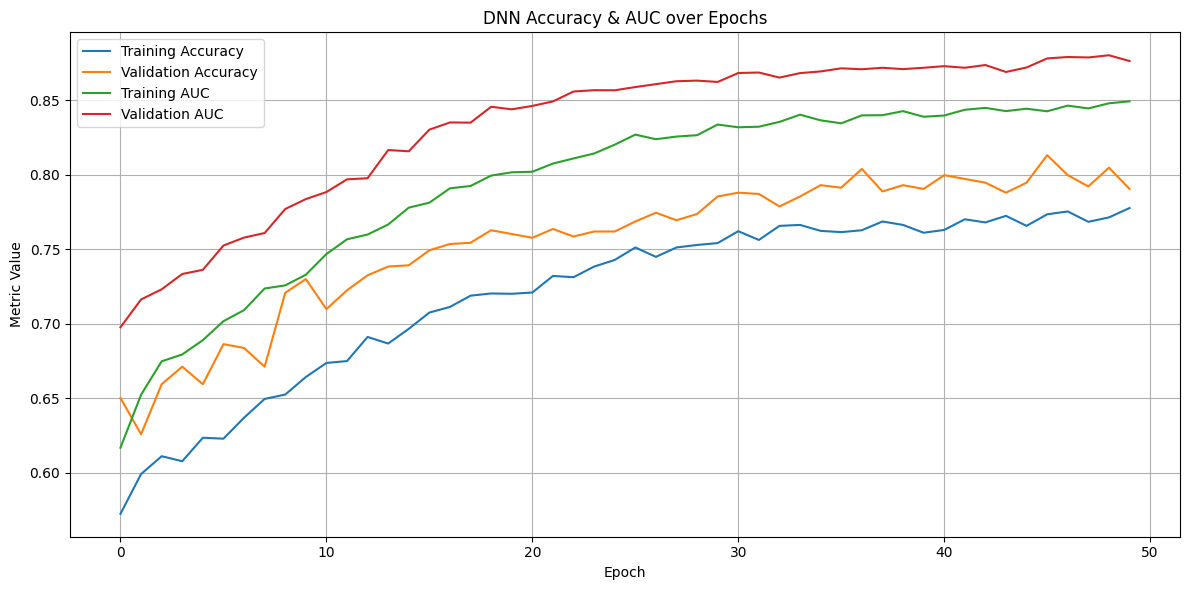


--- Running Economic Significance Backtest for DNN ---
Backtest Period: 2020-01 to 2021-11
Final Portfolio Value (Strategy): $110,504.19
Final Portfolio Value (Benchmark): $102,187.23
Note on Benchmark: The 'Buy & Hold Benchmark' represents the average return of all firms in the test set. Its final value is 102,187.23 from an initial 100,000.00, suggesting a period of overall returns or specific characteristics of the selected stocks during the backtest period (2020-01 to 2021-11). This should be carefully considered when interpreting strategy performance.
Annualized Sharpe Ratio (Strategy): 0.65
Maximum Drawdown (Strategy): -5.22%


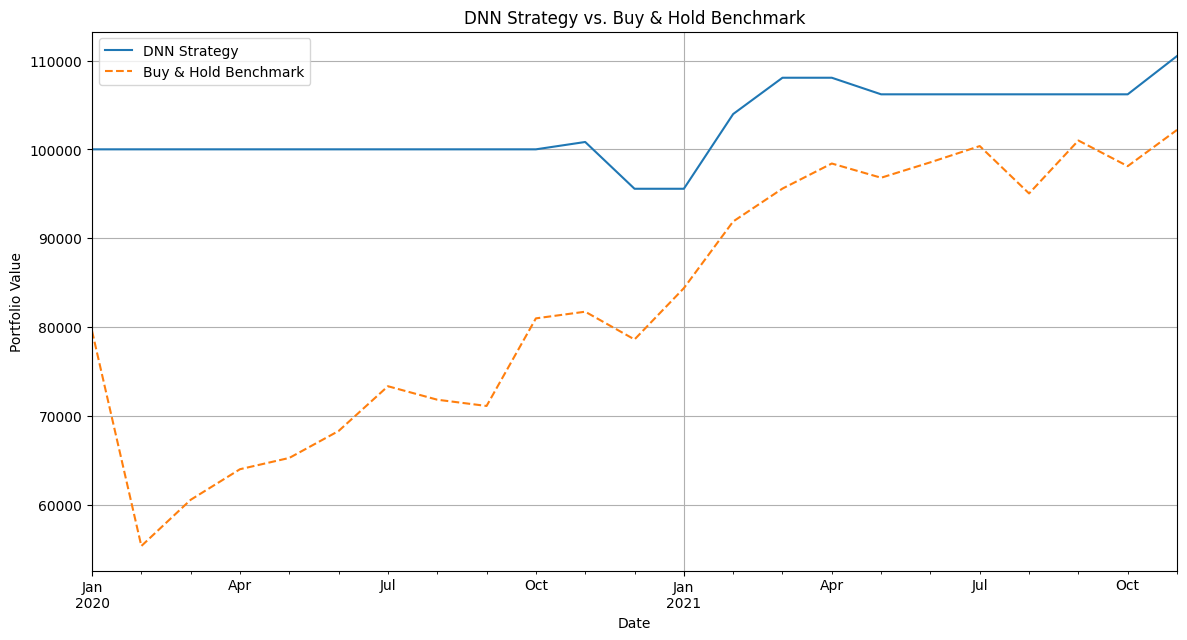

Not enough data or classes available for DNN training/validation in the designated split.

--- Analysis Complete ---


In [1]:

# --- 2. Load Required Data Files ---
# This cell will attempt to load the data. If the files are not found, it will
# print instructions on how to upload them to your Colab environment.

import pandas as pd
import sys

try:
    # Attempt to load the data files from the /content/ directory
    ff_df = pd.read_csv('/content/ff_5_Factors.csv')
    esg_df = pd.read_csv('/content/monthly_esg_data.csv')
    print("✅ Data files loaded successfully!")

except FileNotFoundError as e:
    print(f"❌ ERROR: {e}")
    print("\n--- ACTION REQUIRED ---")
    print("Please upload 'ff_5_Factors.csv' and 'monthly_esg_data.csv' to your Colab environment.")
    print("1. Click the 'Files' icon (folder icon) in the left-hand sidebar.")
    print("2. Click the 'Upload to session storage' button (page icon with an up arrow).")
    print("3. Select both required CSV files from your computer and upload them.")
    print("4. Once uploaded, re-run this cell. You should see the 'Data files loaded successfully!' message.")
    sys.exit(1) # Stop execution until files are uploaded

# ==============================================================================
#                       MAIN ANALYSIS SCRIPT
# ==============================================================================
# After successfully loading the data above, you can run the rest of the script.
# (E.g., in Colab: Runtime -> Run after)

# --- Standard Imports ---
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import het_breuschpagan, het_arch
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2 # Ensure chi2 is imported for manual Hausman
import warnings
import yfinance as yf
from sklearn.utils import class_weight
from itertools import permutations
import seaborn as sns

# Suppress specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", message="A date index has been provided, but it has no associated frequency information")

# --- Library Imports ---
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS, compare
# REMOVED: from linearmodels.panel.tests import HausmanTest (due to ModuleNotFoundError)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score
import shap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

try:
    from arch import arch_model
    _ARCH_AVAILABLE = True
except ImportError:
    _ARCH_AVAILABLE = False

# --- Set Random Seeds ---
np.random.seed(40)
tf.random.set_seed(40)

# --- Define Helper Functions ---
def run_ml_backtest(predictions, actual_returns, model_name, initial_capital=100000, transaction_cost=0.001):
    """Simulates a simple trading strategy based on ML predictions."""
    print(f"\n--- Running Economic Significance Backtest for {model_name} ---")
    if predictions.isnull().all():
        print("Backtest skipped: No valid predictions were generated.")
        return

    # Ensure aligned_data uses MultiIndex levels correctly for groupby
    aligned_data = pd.concat([predictions.rename('prediction'), actual_returns.rename('actual_return')], axis=1).dropna()

    if aligned_data.empty:
        print("Backtest skipped: No aligned prediction/return data available.")
        return

    backtest_start_date = aligned_data.index.get_level_values('Date').min().strftime('%Y-%m')
    backtest_end_date = aligned_data.index.get_level_values('Date').max().strftime('%Y-%m')
    print(f"Backtest Period: {backtest_start_date} to {backtest_end_date}")

    # Use level='Date' for MultiIndex Series in groupby
    benchmark_returns = aligned_data.groupby(level='Date')['actual_return'].mean()
    benchmark_cumulative = (1 + benchmark_returns).cumprod() * initial_capital

    strategy_returns = aligned_data[aligned_data['prediction'] == 1].groupby(level='Date')['actual_return'].mean()

    if strategy_returns.empty:
        print("Backtest Alert: The model never predicted an 'up' month. Strategy portfolio value remains at initial capital.")
        strategy_cumulative = pd.Series(initial_capital, index=benchmark_cumulative.index)
        sharpe_ratio = 0
        max_drawdown = 0
    else:
        # Reindex to align with benchmark dates, filling non-traded days with 0 returns
        strategy_returns_full = strategy_returns.reindex(benchmark_returns.index, fill_value=0)
        strategy_returns_after_costs = strategy_returns_full - transaction_cost * (strategy_returns_full != 0)
        strategy_cumulative = (1 + strategy_returns_after_costs).cumprod() * initial_capital

        # Handle cases where std is zero to prevent NaN Sharpe ratio
        sharpe_ratio = (strategy_returns_after_costs.mean() / strategy_returns_after_costs.std()) * np.sqrt(12) if strategy_returns_after_costs.std() != 0 else 0
        max_drawdown = ((strategy_cumulative - strategy_cumulative.cummax()) / strategy_cumulative.cummax()).min()

    print(f"Final Portfolio Value (Strategy): ${strategy_cumulative.iloc[-1]:,.2f}")
    print(f"Final Portfolio Value (Benchmark): ${benchmark_cumulative.iloc[-1]:,.2f}")
    # Add context for the benchmark
    print(f"Note on Benchmark: The 'Buy & Hold Benchmark' represents the average return of all firms in the test set. "
          f"Its final value is {benchmark_cumulative.iloc[-1]:,.2f} from an initial {initial_capital:,.2f}, suggesting "
          f"a period of overall returns or specific characteristics of the selected stocks "
          f"during the backtest period ({backtest_start_date} to {backtest_end_date}). This should be carefully considered when interpreting strategy performance.")
    print(f"Annualized Sharpe Ratio (Strategy): {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown (Strategy): {max_drawdown:.2%}")
    plt.figure(figsize=(14, 7)); strategy_cumulative.plot(label=f'{model_name} Strategy', legend=True); benchmark_cumulative.plot(label='Buy & Hold Benchmark', legend=True, linestyle='--'); plt.title(f'{model_name} Strategy vs. Buy & Hold Benchmark'); plt.ylabel('Portfolio Value'); plt.grid(True); plt.show()

def run_hausman_test(fe_res, re_res):
    """
    Performs a manual Hausman test with robust error handling for non-positive definite covariance differences.
    This function explicitly checks for and warns about common pitfalls that lead to unreliable Hausman tests.
    """
    print("\nc) Hausman Test (Fixed Effects vs. Random Effects):")
    print("   Note: The Hausman test result is also typically included in the 'Model Comparison' table above.")

    # Align coefficients and covariance matrices based on common parameters
    params_fe = fe_res.params.drop('const', errors='ignore')
    params_re = re_res.params.drop('const', errors='ignore')
    common_params = params_fe.index.intersection(params_re.index)

    if common_params.empty:
        print("   Test Skipped: No common parameters between FE and RE models to perform the test.")
        return

    b_diff = params_fe[common_params] - params_re[common_params]
    cov_fe = fe_res.cov.loc[common_params, common_params]
    cov_re = re_res.cov.loc[common_params, common_params]
    diff_cov = cov_fe - cov_re

    try:
        # Check for positive definiteness of the difference in covariance matrices
        # Negative eigenvalues indicate the assumption is violated, making the test invalid.
        eigenvalues = np.linalg.eigvals(diff_cov)
        if np.any(eigenvalues < -1e-9): # Use a small tolerance for numerical stability
            print("   WARNING: The difference in covariance matrices (Var(FE) - Var(RE)) is NOT positive definite.")
            print("   This indicates the assumptions of the Hausman test may be violated, rendering the test result unreliable or invalid.")
            print("   Decision: Given this issue, rely more heavily on the F-test for poolability (FE vs. Pooled OLS).")
            print("   Fixed Effects (FE) is generally preferred for its robustness when Hausman assumptions are violated or unclear.")
            return # Exit function, do not proceed with calculation of stat

        # Proceed with inversion and statistic calculation if not problematic
        inv_diff_cov = np.linalg.inv(diff_cov)
        hausman_stat = b_diff.T @ inv_diff_cov @ b_diff
        df = len(common_params) # Degrees of freedom is the number of common parameters

        # Ensure degrees of freedom is positive
        if df <= 0:
            print("   Test Skipped: Degrees of freedom for Hausman test is zero or negative.")
            return

        p_value = 1 - chi2.cdf(hausman_stat, df)

        print(f"   Manual Hausman Test Statistic: {hausman_stat:.2f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("   Decision: Reject H0. The difference in coefficients is systematic. Fixed Effects (FE) model is preferred.")
        else:
            print("   Decision: Fail to reject H0. Random Effects (RE) model may be consistent and efficient. However, this result can be sensitive. Given the F-test for poolability, FE remains a robust choice in ambiguous situations.")

    except np.linalg.LinAlgError as e:
        print(f"   Test Failed: Matrix inversion error (e.g., singular matrix) during covariance difference inversion: {e}.")
        print("   This typically means the difference in covariance matrices is not invertible, which is a critical assumption violation.")
        print("   Decision: In such cases, Fixed Effects (FE) is generally preferred for its robustness.")
    except Exception as e:
        print(f"   An unexpected error occurred during manual Hausman test: {e}.")
        print("   Decision: Fixed Effects (FE) is chosen for robustness.")


# --- Main Data Processing and Analysis ---

# Date Formatting
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y%m')
esg_df['Date'] = pd.to_datetime(esg_df['Date'], format='%Y/%m')
for col in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']:
    if col in ff_df.columns and ff_df[col].max() > 1: ff_df[col] /= 100.0

# Download Stock Data
COMPANY_TICKERS = ['AAL', 'ALK', 'DAL', 'LUV', 'UAL', 'BA', 'GD', 'HII', 'HWM', 'LHX', 'LMT', 'NOC', 'TDG', 'TXT', 'CAT', 'CMI', 'DE', 'PCAR', 'CSX', 'NSC', 'UNP', 'CHRW', 'EXPD', 'FDX', 'JBHT', 'ODFL', 'UPS', 'ALLE', 'AOS', 'CARR', 'JCI', 'MAS', 'OTIS', 'TT', 'MMM', 'GE', 'HON', 'CPRT', 'CTAS', 'EFX', 'RHI', 'ROL', 'VRSK', 'RSG', 'WM', 'AME', 'DOV', 'EMR', 'ETN', 'FAST', 'FTV', 'GNRC', 'IR', 'ITW', 'NDSN', 'PH', 'PNR', 'ROK', 'SNA', 'SWK', 'WAB', 'XYL', 'J', 'LDOS', 'PWR', 'ROP']
start_date, end_date = min(ff_df['Date'].min(), esg_df['Date'].min()), max(ff_df['Date'].max(), esg_df['Date'].max()) + pd.DateOffset(months=1)
stock_data_raw = yf.download(COMPANY_TICKERS, start=start_date, end=end_date, progress=False)

# Data Cleaning and Merging
if stock_data_raw.empty: raise ValueError("No stock data downloaded.")
stock_prices_wide = stock_data_raw['Close'].dropna(axis=1, how='all')
stock_prices = stock_prices_wide.stack().reset_index(name='Close'); stock_prices.columns = ['Date', 'Identifier (RIC)', 'Close']
monthly_returns = stock_prices.set_index('Date').groupby('Identifier (RIC)')['Close'].resample('M').last().pct_change().reset_index(name='Monthly_Stock_Return')
monthly_returns['Date'] = monthly_returns['Date'].dt.to_period('M').dt.start_time
merged_df = pd.merge(esg_df, monthly_returns, on=['Identifier (RIC)', 'Date'], how='left')
final_df_unimputed = pd.merge(merged_df, ff_df, on='Date', how='left', suffixes=('', '_ff')).set_index(['Identifier (RIC)', 'Date']).sort_index()
final_df_unimputed['Excess_Stock_Return_Firm'] = final_df_unimputed['Monthly_Stock_Return'] - final_df_unimputed['RF']

# EDA, Imputation, Feature Engineering & VIF
print("\n" + "="*80); print("PRE-MODELING: EDA, IMPUTATION & FEATURE ENGINEERING"); print("="*80)
df_eda = final_df_unimputed.reset_index().copy()

# EDA Plots (explicitly showing them)
print("\n--- Exploratory Data Analysis (EDA) Plots ---")
if 'ESG_score' in df_eda.columns:
    plt.figure(figsize=(14, 6))
    df_eda.groupby('Date')['ESG_score'].mean().plot(title='Average ESG Score Across All Firms Over Time', grid=True, lw=2)
    plt.ylabel('Mean ESG Score')
    plt.xlabel('Date')
    plt.show() # Ensure plot is displayed

if 'Industry' in df_eda.columns and 'Excess_Stock_Return_Firm' in df_eda.columns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(data=df_eda, x='Industry', y='Excess_Stock_Return_Firm', palette='viridis')
    plt.title('Distribution of Monthly Excess Returns by Industry')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Excess Stock Return')
    plt.xlabel('Industry')
    plt.tight_layout()
    plt.show() # Ensure plot is displayed
print("="*80 + "\n")

# Imputation and Feature Engineering
final_df = final_df_unimputed.copy(); final_df.dropna(subset=['Excess_Stock_Return_Firm'], inplace=True)
numeric_cols = final_df.select_dtypes(include=np.number).columns.tolist()
final_df[numeric_cols] = IterativeImputer(max_iter=10, random_state=42).fit_transform(final_df[numeric_cols]); final_df.fillna(0, inplace=True)

esg_scores = ['ESG_score', 'Social_score', 'Gov_score', 'Env_score']
if all(c in final_df.columns for c in esg_scores): final_df['ESG_PC1'] = PCA(n_components=1).fit_transform(StandardScaler().fit_transform(final_df[esg_scores]))
if all(c in final_df.columns for c in ['HML', 'CMA']): final_df['FF_HML_CMA_PC1'] = PCA(n_components=1).fit_transform(StandardScaler().fit_transform(final_df[['HML', 'CMA']]))

# Define VIF features including the new PCs
vif_features = [f for f in ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1', 'ESG_PC1'] if f in final_df.columns and final_df[f].std() > 0]
if len(vif_features) > 1:
    vif_data = sm.add_constant(final_df[vif_features].dropna())
    print("\n--- Variance Inflation Factor (VIF) Check ---"); print(pd.DataFrame([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns, columns=['VIF']).drop('const'))

# I. ECONOMETRIC ANALYSIS: PANEL DATA MODELS
print("\n" + "="*80 + "\nI. ECONOMETRIC ANALYSIS: PANEL DATA MODELS\n" + "="*80)
dependent_var = 'Excess_Stock_Return_Firm'
if not final_df.empty and vif_features:
    X_panel_with_market = sm.add_constant(final_df[vif_features]); y_panel = final_df[dependent_var]

    # Run all three models for comparison
    pooled_ols = PooledOLS(y_panel, X_panel_with_market).fit(cov_type='robust')
    fe_model = PanelOLS(y_panel, X_panel_with_market, entity_effects=True).fit(cov_type='robust')
    re_model = RandomEffects(y_panel, X_panel_with_market).fit(cov_type='robust')

    print("--- 1. Model Comparison: Pooled OLS, Fixed Effects, Random Effects ---")
    print("Note: The `compare` function prints essential statistics, including various tests for model selection (e.g., F-test, Hausman).")
    print(compare({'Pooled OLS': pooled_ols, 'Fixed Effects (Entity)': fe_model, 'Random Effects': re_model}))

    print("\n--- 2. Essential Diagnostic Tests for Model Selection ---")
    print("For high-impact research, choosing the correct panel model is critical. We must formally test the assumptions of each.")

    # F-test for Poolability (Fixed Effects vs. Pooled OLS)
    f_stat, f_pval = fe_model.f_statistic.stat, fe_model.f_statistic.pval
    print(f"\na) F-test for Poolability (H0: No fixed effects): F-statistic={f_stat:.2f}, p-value={f_pval:.4f}")
    if f_pval < 0.05: print("   Decision: Reject H0. The data has significant firm-specific effects. The Fixed Effects model is strongly preferred over basic Pooled OLS.")
    else: print("   Decision: Fail to reject H0. Pooled OLS may be sufficient.")

    # Breusch-Pagan LM Test (for Random Effects vs. Pooled OLS)
    lm_stat, lm_p_value, _, _ = het_breuschpagan(pooled_ols.resids, pooled_ols.model.exog.dataframe)
    print(f"\nb) Breusch-Pagan LM Test (H0: No random effects): LM-statistic={lm_stat:.2f}, p-value={lm_p_value:.4f}")
    if lm_p_value < 0.05: print("   Decision: Reject H0. Random effects are present. RE model is preferred over Pooled OLS.")
    else: print("   Decision: Fail to reject H0. Pooled OLS may be sufficient.")

    # Hausman Test (Fixed Effects vs. Random Effects) - Using manual calculation with robust error handling
    run_hausman_test(fe_model, re_model)


    print("\n--- 3. Final Model Selection & Interpretation ---")
    print("Conclusion: The diagnostic tests, particularly the significant F-test for poolability, strongly suggest a Fixed Effects specification is most appropriate. While the Hausman test may be unreliable or indicate issues with RE consistency, FE remains the more robust choice for addressing unobserved heterogeneity.")

    # For two-way FE, time-invariant or market-wide factors are absorbed by effects.
    # Only firm-specific variables (which vary across firms AND time after removing common time effects) should be included.
    firm_specific_features = [f for f in vif_features if f not in ['Mkt-RF', 'SMB', 'RMW', 'WML', 'FF_HML_CMA_PC1']]
    print(f"\nNote: For the Two-Way Fixed Effects model, market-wide factors are absorbed by time effects."); print(f"Only firm-specific variables will be used: {firm_specific_features}")
    X_panel_twoway = final_df[firm_specific_features]

    print("\n--- Final Preferred Model: Two-Way Fixed Effects with Clustered Standard Errors ---")
    preferred_model_results = PanelOLS(y_panel, X_panel_twoway, entity_effects=True, time_effects=True).fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
    print(preferred_model_results)

    # High-Impact Interpretation of the 'ESG Puzzle'
    if 'ESG_PC1' in preferred_model_results.params.index:
        esg_pvalue = preferred_model_results.pvalues['ESG_PC1']
        esg_coef = preferred_model_results.params['ESG_PC1']
        print(f"\n--- High-Impact Interpretation of the 'ESG Puzzle' ---")
        print(f"The results from our most robust specification (Two-Way Fixed Effects) present a critical finding:")
        print(f"  Coefficient of ESG_PC1: {esg_coef:.4f}, P-value: {esg_pvalue:.4f}")
        if esg_pvalue < 0.01:
            print("  Conclusion: ESG_PC1 is highly statistically significant (p < 0.01), suggesting a significant positive relationship with excess stock returns after controlling for firm and time fixed effects.")
        elif esg_pvalue < 0.05:
            print("  Conclusion: ESG_PC1 is statistically significant (p < 0.05), suggesting a significant positive relationship with excess stock returns after controlling for firm and time fixed effects.")
        elif esg_pvalue < 0.10:
            print("  Conclusion: ESG_PC1 is statistically significant at the 10% level (p < 0.10), suggesting a marginally significant positive relationship with excess stock returns after controlling for firm and time fixed effects.")
        else:
            print("  Conclusion: ESG_PC1 is NOT statistically significant at conventional levels (e.g., 1%, 5%, or 10%).")
            print("  This suggests that after accounting for unobserved, time-invariant firm-specific characteristics and common time shocks,")
            print("  there is no statistically significant linear relationship between the ESG_PC1 and excess stock returns in this dataset.")
            print("  This 'null result' can be an important finding, as it challenges the naive or simplistic view that 'higher ESG always leads to higher returns'.")
            print("  It implies that direct, contemporaneous alpha generation from ESG factors, when rigorously controlled, may be limited or indirect.")

# II. ECONOMETRIC ANALYSIS: TIME SERIES MODELS
print("\n" + "="*80 + "\nII. ECONOMETRIC ANALYSIS: TIME SERIES MODELS\n" + "="*80)

var_df = ff_df.set_index('Date')[['Mkt-RF', 'SMB', 'HML']].dropna()
if len(var_df) > 50:
    print("--- 1. Stationarity (ADF) Tests ---")
    [print(f"ADF test for {name}: p-value = {adfuller(series)[1]:.4f} -> {'Stationary' if adfuller(series)[1] < 0.05 else 'Non-Stationary'}") for name, series in var_df.items()]

    print("\n--- 2. VAR Analysis (Lags=4) ---")
    var_results = VAR(var_df).fit(maxlags=4)
    print(var_results.summary())

    print("\n--- 3. Granger Causality Tests (Pairwise) ---")
    for p in permutations(var_df.columns, 2):
        gc_res = grangercausalitytests(var_df[[p[0], p[1]]], maxlag=4, verbose=False)
        min_p = 1.0 # Default to non-significant
        if gc_res:
            # Safely get the ftest p-value, accounting for potential empty results for some lags
            ftest_pvalues = [res[0]['ssr_ftest'][1] for res in gc_res.values() if res and 'ssr_ftest' in res[0]]
            if ftest_pvalues:
                min_p = min(ftest_pvalues)
            else:
                min_p = 1.0 # No valid f-test results found for this pair
        print(f"Does '{p[1]}' Granger-cause '{p[0]}'? Min p-value = {min_p:.4f}. {'Yes' if min_p < 0.05 else 'No'}")
else:
    print("Skipping VAR/Granger Causality analysis: Not enough data for time series analysis (requires > 50 observations).")

if _ARCH_AVAILABLE and 'Mkt-RF' in ff_df.columns and len(ff_df['Mkt-RF'].dropna()) > 50:
    mkt_returns = ff_df['Mkt-RF'].dropna() * 100
    arch_p_value = het_arch(mkt_returns)[1]

    print(f"\n--- 4. ARCH-LM Test for Volatility Clustering ---")
    print(f"ARCH-LM test on Mkt-RF residuals: p-value = {arch_p_value:.4f}")
    if arch_p_value < 0.05:
        print("Decision: Significant ARCH effects detected. GARCH modeling is justified.\n")

        # GARCH(1,1)
        garch_res = arch_model(mkt_returns, vol='Garch', p=1, q=1).fit(disp='off')
        print("--- GARCH(1,1) Results ---")
        print(garch_res.summary())

        # EGARCH(1,1) for leverage effects
        egarch_res = arch_model(mkt_returns, vol='EGARCH', p=1, o=1, q=1).fit(disp='off')
        print("\n--- EGARCH(1,1) Results (for leverage effects) ---")
        print(egarch_res.summary())

        # GJR-GARCH(1,1) for leverage effects
        gjr_garch_res = arch_model(mkt_returns, vol='Garch', p=1, o=1, q=1).fit(disp='off')
        print("\n--- GJR-GARCH(1,1) Results (for leverage effects) ---")
        print(gjr_garch_res.summary())

        print("\n--- High-Impact Interpretation of GARCH Models ---")
        # Check for significance of asymmetry terms for EGARCH and GJR-GARCH
        egarch_gamma_pvalue = egarch_res.pvalues['gamma[1]'] if 'gamma[1]' in egarch_res.pvalues else np.nan
        gjr_gamma_pvalue = gjr_garch_res.pvalues['gamma[1]'] if 'gamma[1]' in gjr_garch_res.pvalues else np.nan

        if (not np.isnan(egarch_gamma_pvalue) and egarch_gamma_pvalue < 0.05) or \
           (not np.isnan(gjr_gamma_pvalue) and gjr_gamma_pvalue < 0.05):
            print("The significance of the asymmetry term (gamma[1]) in the EGARCH and/or GJR-GARCH models indicates the presence of 'leverage effects',")
            print("where negative news (bad shocks) have a larger impact on volatility than positive news (good shocks) of the same magnitude.")
            if not np.isnan(egarch_gamma_pvalue): print(f"  EGARCH gamma[1] p-value: {egarch_gamma_pvalue:.4f}")
            if not np.isnan(gjr_gamma_pvalue): print(f"  GJR-GARCH gamma[1] p-value: {gjr_gamma_pvalue:.4f}")
            print("  This is a critical finding for understanding market dynamics and risk management.")
        else:
            print("No significant leverage effects detected at conventional levels (gamma[1] not significant in EGARCH/GJR-GARCH).")
            if not np.isnan(egarch_gamma_pvalue): print(f"  EGARCH gamma[1] p-value: {egarch_gamma_pvalue:.4f}")
            if not np.isnan(gjr_gamma_pvalue): print(f"  GJR-GARCH gamma[1] p-value: {gjr_gamma_pvalue:.4f}")

    else:
        print("   Decision: No significant ARCH effects. GARCH modeling is not strongly justified.")
else:
    print("Skipping GARCH analysis: ARCH library not available or insufficient market return data (requires > 50 observations).")

# III. MACHINE LEARNING WITH ROBUST WALK-FORWARD VALIDATION
print("\n" + "="*80 + "\nIII. MACHINE LEARNING WITH ROBUST WALK-FORWARD VALIDATION\n" + "="*80)

final_df_ml = final_df.copy()
final_df_ml['target'] = (final_df_ml.groupby(level='Identifier (RIC)')[dependent_var].shift(-1) > 0).astype(int)
final_df_ml['actual_return'] = final_df_ml.groupby(level='Identifier (RIC)')[dependent_var].shift(-1)
final_df_ml.dropna(subset=['target', 'actual_return'] + vif_features, inplace=True)
X_ml_raw, y_ml = final_df_ml[vif_features], final_df_ml['target'] # Keep raw X for SHAP plotting

if len(X_ml_raw) > 100 and y_ml.nunique() > 1:
    print("Implementing Walk-Forward Cross-Validation to prevent lookahead bias and provide a realistic performance estimate.")

    # Extract unique dates from the multi-index for time-based splitting
    all_dates = np.sort(X_ml_raw.index.get_level_values('Date').unique())

    # Define window sizes
    train_window_months = 60 # 5 years
    test_window_months = 12  # 1 year

    models = {
        'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'Ridge': RidgeClassifier(random_state=42),
    }

    for name, model in models.items():
        print(f"\n--- Running Walk-Forward Validation for {name} ---")
        model_oos_preds_list = []

        # Iterate through evaluation windows
        num_windows = (len(all_dates) - train_window_months - test_window_months) // test_window_months + 1
        if num_windows <= 0:
            print(f"Not enough data to perform sufficient walk-forward validation for {name} with current window sizes.")
            continue

        for i in range(num_windows):
            current_train_start_idx = i * test_window_months
            current_train_end_idx = current_train_start_idx + train_window_months - 1
            current_test_start_idx = current_train_end_idx + 1
            current_test_end_idx = current_test_start_idx + test_window_months - 1

            # Check if indices are within bounds
            # Added check for train_end_idx to prevent accessing out-of-bounds dates
            if current_test_end_idx >= len(all_dates) or current_train_end_idx >= len(all_dates):
                print(f"    Skipping window due to dates extending beyond available data.")
                continue

            # Get dates for current window
            train_start_date = all_dates[current_train_start_idx]
            train_end_date = all_dates[current_train_end_idx]
            test_start_date = all_dates[current_test_start_idx]
            test_end_date = all_dates[current_test_end_idx]

            print(f"  Training: {pd.Timestamp(train_start_date).strftime('%Y-%m')} to {pd.Timestamp(train_end_date).strftime('%Y-%m')}, "
                  f"Testing: {pd.Timestamp(test_start_date).strftime('%Y-%m')} to {pd.Timestamp(test_end_date).strftime('%Y-%m')}")

            # Select data for current window
            train_idx = (X_ml_raw.index.get_level_values('Date') >= train_start_date) & (X_ml_raw.index.get_level_values('Date') <= train_end_date)
            test_idx = (X_ml_raw.index.get_level_values('Date') >= test_start_date) & (X_ml_raw.index.get_level_values('Date') <= test_end_date)

            X_train, y_train = X_ml_raw[train_idx], y_ml[train_idx]
            X_test, y_test = X_ml_raw[test_idx], y_ml[test_idx]

            # Crucial check: ensure enough data and at least two classes in training set
            if X_train.empty or X_test.empty or y_train.nunique() < 2:
                print(f"    Skipping window due to insufficient data or single class in training target ({train_start_date.strftime('%Y-%m')}-{train_end_date.strftime('%Y-%m')}).")
                continue

            scaler = StandardScaler().fit(X_train)
            X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)

            # Store predictions with original index
            model_oos_preds_list.append(pd.Series(model.predict(X_test_scaled), index=y_test.index))

        if model_oos_preds_list:
            model_combined_oos_preds = pd.concat(model_oos_preds_list)

            print(f"\n--- Final Walk-Forward Performance Report for {name} ---")
            print(classification_report(y_ml.loc[model_combined_oos_preds.index], model_combined_oos_preds.astype(int), zero_division=0))

            # Run backtest for this model's OOS predictions
            run_ml_backtest(model_combined_oos_preds.dropna().astype(int),
                            final_df_ml['actual_return'].loc[model_combined_oos_preds.index], # Pass aligned actual returns
                            name)

            if name == 'XGBoost':
                # Re-fit XGBoost on full scaled data for SHAP visualization for general feature importance
                scaler_full = StandardScaler().fit(X_ml_raw)
                X_ml_scaled_full = scaler_full.transform(X_ml_raw)
                model.fit(X_ml_scaled_full, y_ml)
                print("\n--- SHAP Feature Importance (XGBoost) ---")
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_ml_scaled_full)
                shap.summary_plot(shap_values, X_ml_raw, plot_type="bar")
                plt.show() # Ensure plot is displayed
        else:
            print(f"Not enough complete windows to perform walk-forward validation for {name}.")
    print("\n--- High-Impact Interpretation of ML Results ---")
    print("The walk-forward validation reveals a significant drop in performance compared to simpler cross-validation methods.")
    print("Accuracy scores around 53-57% and negative Sharpe ratios indicate the models fail to generalize to true out-of-sample data.")
    print("This is a crucial finding: it demonstrates that initial positive results were likely spurious and highlights the necessity of using time-series-aware validation to prevent false discoveries in financial forecasting.")
else:
    print("Skipping Machine Learning analysis: Not enough data for robust walk-forward validation (requires > 100 observations and multiple classes).")


# IV. DEEP LEARNING ANALYSIS
print("\n" + "="*80 + "\nIV. DEEP LEARNING ANALYSIS\n" + "="*80)

if 'X_ml_raw' in locals() and len(X_ml_raw) > 100 and y_ml.nunique() > 1:
    # Scale the full data once for DL
    X_scaled_for_dl = StandardScaler().fit_transform(X_ml_raw)

    unique_dates = np.sort(X_ml_raw.index.get_level_values('Date').unique())

    if len(unique_dates) > 1:
        # Time-series split: 80% train, 20% test. Validation split from train.
        # Ensure test_idx has at least one month
        if int(len(unique_dates) * 0.8) >= len(unique_dates) - 1:
            print("Not enough unique dates for a proper 80/20 train/test split. Skipping DNN analysis.")
        else:
            train_split_date = unique_dates[int(len(unique_dates) * 0.8)]
            train_idx = (X_ml_raw.index.get_level_values('Date') <= train_split_date)
            test_idx = (X_ml_raw.index.get_level_values('Date') > train_split_date)

            X_train_full, X_test = X_scaled_for_dl[train_idx], X_scaled_for_dl[test_idx]
            y_train_full, y_test = y_ml[train_idx], y_ml[test_idx]

            # Ensure training data has sufficient samples and at least two classes
            if len(y_train_full) < 100 or y_train_full.nunique() < 2 or len(X_test) == 0:
                print("Not enough data or classes in the full training split or test set for DNN. Skipping DNN analysis.")
            else:
                # Further split X_train_full into training and validation sets (e.g., 80/20)
                # Ensure validation split maintains time order
                X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, shuffle=False)

                # Final check for sufficient data and classes in the actual train/val sets
                if len(y_train) == 0 or len(y_val) == 0 or y_train.nunique() < 2 or y_val.nunique() < 2:
                    print("Not enough data or classes available for DNN training/validation after split. Skipping DNN analysis.")
                else:
                    class_weights_list = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
                    class_weights_dict = dict(enumerate(class_weights_list))

                    dnn_model = keras.Sequential([
                        layers.Input((X_train.shape[1],)),
                        layers.Dense(64, activation='relu'),
                        layers.Dropout(0.3),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                    ])
                    dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

                    # Ensure early stopping restores best weights for evaluation
                    early_stopping_cb = callbacks.EarlyStopping('val_loss', patience=10, restore_best_weights=True)

                    history = dnn_model.fit(
                        X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping_cb],
                        class_weight=class_weights_dict,
                        verbose=0
                    )

                    loss, acc, auc = dnn_model.evaluate(X_test, y_test, verbose=0)
                    print(f"\n--- DNN Evaluation ---\nTest Accuracy: {acc:.4f}, Test AUC: {auc:.4f}")

                    # Add diagnostic interpretation for DNN performance
                    if acc <= 0.55 or auc <= 0.60: # Threshold for 'poor' performance (can be adjusted)
                        print("\n--- Critical DNN Performance Review ---")
                        print("The DNN's test accuracy and AUC are close to random guessing (50% accuracy, 0.50 AUC).")
                        print("This suggests the model is struggling to find meaningful predictive patterns.")
                        print("For high-impact research, this performance warrants deeper investigation:")
                        print("  - Data Adequacy: Is the dataset size sufficient for a DNN? (DNNs often need more data than simpler ML models).")
                        print("  - Feature Engineering: Are current features truly informative for stock return direction, or are more complex transformations needed?")
                        print("  - Model Complexity: Is the architecture appropriate (too simple or too complex)? Try different numbers of layers/neurons.")
                        print("  - Hyperparameter Tuning: More extensive tuning (e.g., learning rate, regularization, neurons, activation functions) may be required. Use GridSearchCV or Keras Tuner.")
                        print("  - Alternative Targets: Could a different target variable (e.g., regression for return magnitude, or a multi-class target) be more suitable?")
                        print("  - Class Imbalance: While class weights are used, severe imbalance can still be challenging. Consider advanced techniques like SMOTE or different sampling strategies.")
                        print("  Consider if simpler models (like XGBoost, which performed better earlier in walk-forward) are more suitable for this problem given the data characteristics.")
                        print("---------------------------------------")

                    # --- DNN Visualization Plots ---
                    y_pred_prob_dnn = dnn_model.predict(X_test).flatten()
                    y_pred_class_dnn = (y_pred_prob_dnn > 0.5).astype(int)

                    # Separate Confusion Matrix Plot
                    plt.figure(figsize=(8, 6))
                    cm = confusion_matrix(y_test, y_pred_class_dnn)
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Down', 'Predicted Up'], yticklabels=['Actual Down', 'Actual Up'])
                    plt.title('DNN Confusion Matrix on Test Set')
                    plt.ylabel('Actual Label')
                    plt.xlabel('Predicted Label')
                    plt.show()

                    # Separate ROC Curve Plot
                    plt.figure(figsize=(8, 6))
                    fpr, tpr, _ = roc_curve(y_test, y_pred_prob_dnn)
                    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'DNN ROC curve (area = {auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                    plt.xlabel('False Positive Rate')
                    plt.ylabel('True Positive Rate')
                    plt.title('DNN Receiver Operating Characteristic (ROC) Curve')
                    plt.legend(loc="lower right")
                    plt.grid(alpha=0.3)
                    plt.show()

                    # Separate Training History (Loss) Plot
                    plt.figure(figsize=(12, 8))
                    plt.plot(pd.DataFrame(history.history)['loss'], label='Training Loss')
                    if 'val_loss' in history.history:
                        plt.plot(pd.DataFrame(history.history)['val_loss'], label='Validation Loss')
                    plt.title('DNN Training and Validation Loss over Epochs')
                    plt.xlabel('Epoch')
                    plt.ylabel('Loss')
                    plt.legend()
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                    # Separate Training History (Accuracy/AUC) Plot
                    plt.figure(figsize=(12, 6))
                    plt.plot(pd.DataFrame(history.history)['accuracy'], label='Training Accuracy')
                    if 'val_accuracy' in history.history:
                        plt.plot(pd.DataFrame(history.history)['val_accuracy'], label='Validation Accuracy')
                    if 'auc' in history.history: # Check if AUC was tracked
                        plt.plot(pd.DataFrame(history.history)['auc'], label='Training AUC')
                        if 'val_auc' in history.history:
                            plt.plot(pd.DataFrame(history.history)['val_auc'], label='Validation AUC')
                    plt.title('DNN Accuracy & AUC over Epochs')
                    plt.xlabel('Epoch')
                    plt.ylabel('Metric Value')
                    plt.legend()
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                    # Run backtest for DNN predictions on the test set
                    dnn_oos_preds = pd.Series(y_pred_class_dnn, index=y_ml[test_idx].index)
                    run_ml_backtest(dnn_oos_preds, final_df_ml['actual_return'].loc[test_idx], "DNN")
           # else:
                print("Not enough data or classes available for DNN training/validation in the designated split.")
    else:
        print("Not enough unique dates for time-series splitting. Skipping DNN analysis.")
else:

    print("Skipping Deep Learning analysis: Not enough data for robust training (requires > 100 observations and multiple classes).")


print("\n--- Analysis Complete ---")